<div style="border:solid Chocolate 2px; padding: 40px">

Максим, привет, меня зовут Станислав, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
⚠️  <b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента 2:</b> Станислав, ты направил мой проект на редакцию, но я не вижу больше других замечаний. Я исправил запрос sql и дашборды соответственно с замечаниями. Ты это отметил. Что еще требуется доработаь7</div>

</div>

<div class="alert alert-success">
✔️<b>Комментарий ревьюера в3:</b> 

Я случайно отправил проект на редакцию, извини, все твои замечания исправлены, проект принимаю.

# Сборный проект №2

Цель проекта - определить текущий уровень потребительской лояльности, или NPS (от англ. Net Promoter Score), среди клиентов из России.

В качестве основы данных выступает опрос клиентов - «Оцените по шкале от 1 до 10 вероятность того, что вы порекомендуете компанию друзьям и знакомым».

Необходимо подготовить дашборд с его итогами. 


<div class="alert alert-success">
✔️<b>Комментарий с комплиментом ревьюера:</b> 

Здорово, что ты добавил в начале проекта введение, описал задачи. 

Еще можно добавить название проекта, чтобы сразу понять на какую тему работа.


## Подключение к базе

Импортируем библиотеки

In [1]:
import os
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

Находим базу данных

In [2]:
path_to_db_local = 'telecomm_csi.db'
path_to_db_platform = '/datasets/telecomm_csi.db'
path_to_db = None

if os.path.exists(path_to_db_local):
    path_to_db = path_to_db_local
elif os.path.exists(path_to_db_platform):
    path_to_db = path_to_db_platform
else:
    raise Exception('Файл с базой данных SQLite не найден!')

if path_to_db:
    engine = create_engine(f'sqlite:///{path_to_db}', echo=False)

Таким образом, можно открыть базу данных как и онлайн, так и с локального хранилища

## Выгрузка данных

Осуществляем запрос

In [3]:
query = """
select user_id, 
lt_day, 
(case 
    when lt_day < 365 then 'True' 
    else 'False' 
    END) is_new, 
age, 
(case 
    when gender_segment == 1 then 'Женщина' 
    when gender_segment == 0 then 'Мужчина' 
    else "неизвестно"
    end) gender_segment,
os_name,
cpe_type_name,
country,
city,
age_segment.title age_segment,
traffic_segment.title traffic_segment,
lifetime_segment.title lifetime_segment,
nps_score,
(case 
    when nps_score between 9 and 10 then 'Сторонники' 
    when nps_score between 7 and 8 then "Нейтралы" 
    else "Критики" 
    end) nps_group
from user
inner join location on user.location_id=location.location_id
inner join age_segment on user.age_gr_id=age_segment.age_gr_id
inner join traffic_segment on user.tr_gr_id=traffic_segment.tr_gr_id
inner join lifetime_segment on user.lt_gr_id=lifetime_segment.lt_gr_id
"""

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Формирование признака пола (case 
    when gender_segment == 1 then 'Женщина' 
    else 'Мужчина' 
    end) gender_segment  будет работать корректно в том случае, если в данных имеются только поля 0 и 1, необходимо удостовериться, что это именно так, потому что могут иметься пропуски в данных.
    
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправляю SQL запрос, добавляю проверку, которая удостверится, что значение "gender_segment" 1 или 0. Если оно иное, то выведет пол "неизвестно"</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера в2:</b> 

Корректно

Создаем датафрейм

In [4]:
df = pd.read_sql(query, engine)
df.head(15)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,False,45.0,Женщина,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,04 1-5,08 36+,10,Сторонники
1,A001WF,2344,False,53.0,Мужчина,ANDROID,SMARTPHONE,Россия,Киров,05 45-54,04 1-5,08 36+,10,Сторонники
2,A003Q7,467,False,57.0,Мужчина,ANDROID,SMARTPHONE,Россия,Москва,06 55-64,08 20-25,06 13-24,10,Сторонники
3,A004TB,4190,False,44.0,Женщина,IOS,SMARTPHONE,Россия,РостовнаДону,04 35-44,03 0.1-1,08 36+,10,Сторонники
4,A004XT,1163,False,24.0,Мужчина,ANDROID,SMARTPHONE,Россия,Рязань,02 16-24,05 5-10,08 36+,10,Сторонники
5,A005O0,5501,False,42.0,Женщина,ANDROID,SMARTPHONE,Россия,Омск,04 35-44,05 5-10,08 36+,6,Критики
6,A0061R,1236,False,45.0,Мужчина,ANDROID,SMARTPHONE,Россия,Уфа,05 45-54,06 10-15,08 36+,10,Сторонники
7,A009KS,313,True,35.0,Мужчина,ANDROID,SMARTPHONE,Россия,Москва,04 35-44,13 45-50,05 7-12,10,Сторонники
8,A00AES,3238,False,36.0,Женщина,ANDROID,SMARTPHONE,Россия,СанктПетербург,04 35-44,04 1-5,08 36+,10,Сторонники
9,A00F70,4479,False,54.0,Женщина,ANDROID,SMARTPHONE,Россия,Волгоград,05 45-54,07 15-20,08 36+,9,Сторонники


Проверим данные

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502493 entries, 0 to 502492
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           502493 non-null  object 
 1   lt_day            502493 non-null  int64  
 2   is_new            502493 non-null  object 
 3   age               501939 non-null  float64
 4   gender_segment    502493 non-null  object 
 5   os_name           502493 non-null  object 
 6   cpe_type_name     502493 non-null  object 
 7   country           502493 non-null  object 
 8   city              502493 non-null  object 
 9   age_segment       502493 non-null  object 
 10  traffic_segment   502493 non-null  object 
 11  lifetime_segment  502493 non-null  object 
 12  nps_score         502493 non-null  int64  
 13  nps_group         502493 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 53.7+ MB


In [6]:
df.loc[df['age'].isna()]

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
751,A1E59W,4055,False,NaN,неизвестно,ANDROID,SMARTPHONE,Россия,Екатеринбург,08 n/a,04 1-5,08 36+,1,Критики
1209,A28ZDT,4243,False,NaN,неизвестно,ANDROID,SMARTPHONE,Россия,Хабаровск,08 n/a,04 1-5,08 36+,5,Критики
1321,A2GLPQ,2354,False,NaN,неизвестно,ANDROID,SMARTPHONE,Россия,Иркутск,08 n/a,06 10-15,08 36+,1,Критики
2163,A41C1K,557,False,NaN,неизвестно,ANDROID,SMARTPHONE,Россия,РостовнаДону,08 n/a,04 1-5,06 13-24,3,Критики
2667,A513VG,4705,False,NaN,неизвестно,IOS,SMARTPHONE,Россия,Екатеринбург,08 n/a,23 95-100,08 36+,9,Сторонники
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499598,ZUDYU9,520,False,NaN,неизвестно,ANDROID,SMARTPHONE,Россия,СанктПетербург,08 n/a,24 100+,06 13-24,9,Сторонники
500834,ZWQJRW,220,True,NaN,Мужчина,ANDROID,SMARTPHONE,Россия,Самара,08 n/a,03 0.1-1,05 7-12,1,Критики
501246,ZXK9AK,3550,False,NaN,неизвестно,ANDROID,SMARTPHONE,Россия,Томск,08 n/a,04 1-5,08 36+,4,Критики
502376,ZZRS2G,345,True,NaN,Мужчина,ANDROID,SMARTPHONE,Россия,Москва,08 n/a,04 1-5,05 7-12,5,Критики


Как видим, 554 записи не имеют значения в столбце "возраст". Однако, это учтено в датасете, так как у данных строк группа возрастного сегмента 08 - n/a или отсутствует значение. Таким образом, датафрейм готов к выгрузке в формат csv

In [7]:
df['gender_segment'].value_counts()

Женщина       272442
Мужчина       228750
неизвестно      1301
Name: gender_segment, dtype: int64

In [8]:
df.to_csv('telecomm_csi_tableau.csv', index=False)


<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Данные выгружены корректно, молодец. 
    
Здорово, что выведена информация по полученному датасету.

</div>


## Создание дашбордов в Tableu

In [9]:
(len(df.loc[df['age'].isna()])/len(df))*100

0.11025029204386927

In [10]:
(len(df.loc[df['gender_segment']=='неизвестно'])/len(df))*100

0.25890907933045837

Можно сделать вывод, что кол-во записей, где не указан возраст, составляет ~0,11% от общего кол-ва записей. Будет установлен фильтр на уровне базы данных, в котором все строки без возраста будут убраны

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Также можно сделать вывод, что кол-во записей, где неизвестен пол, составляет 0,26% от общего кол-ва записей. Будет установлен фильтр на уровне базы данных, в котором все такие строки будут убраны</div>

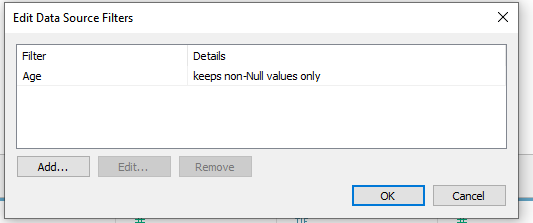
Старый скриншот

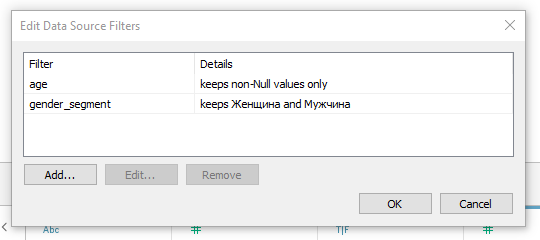
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Новый скриншот</div>

Для рассмотрения общей информации о клиентах, прошедших опрос, был построен дашборд №1

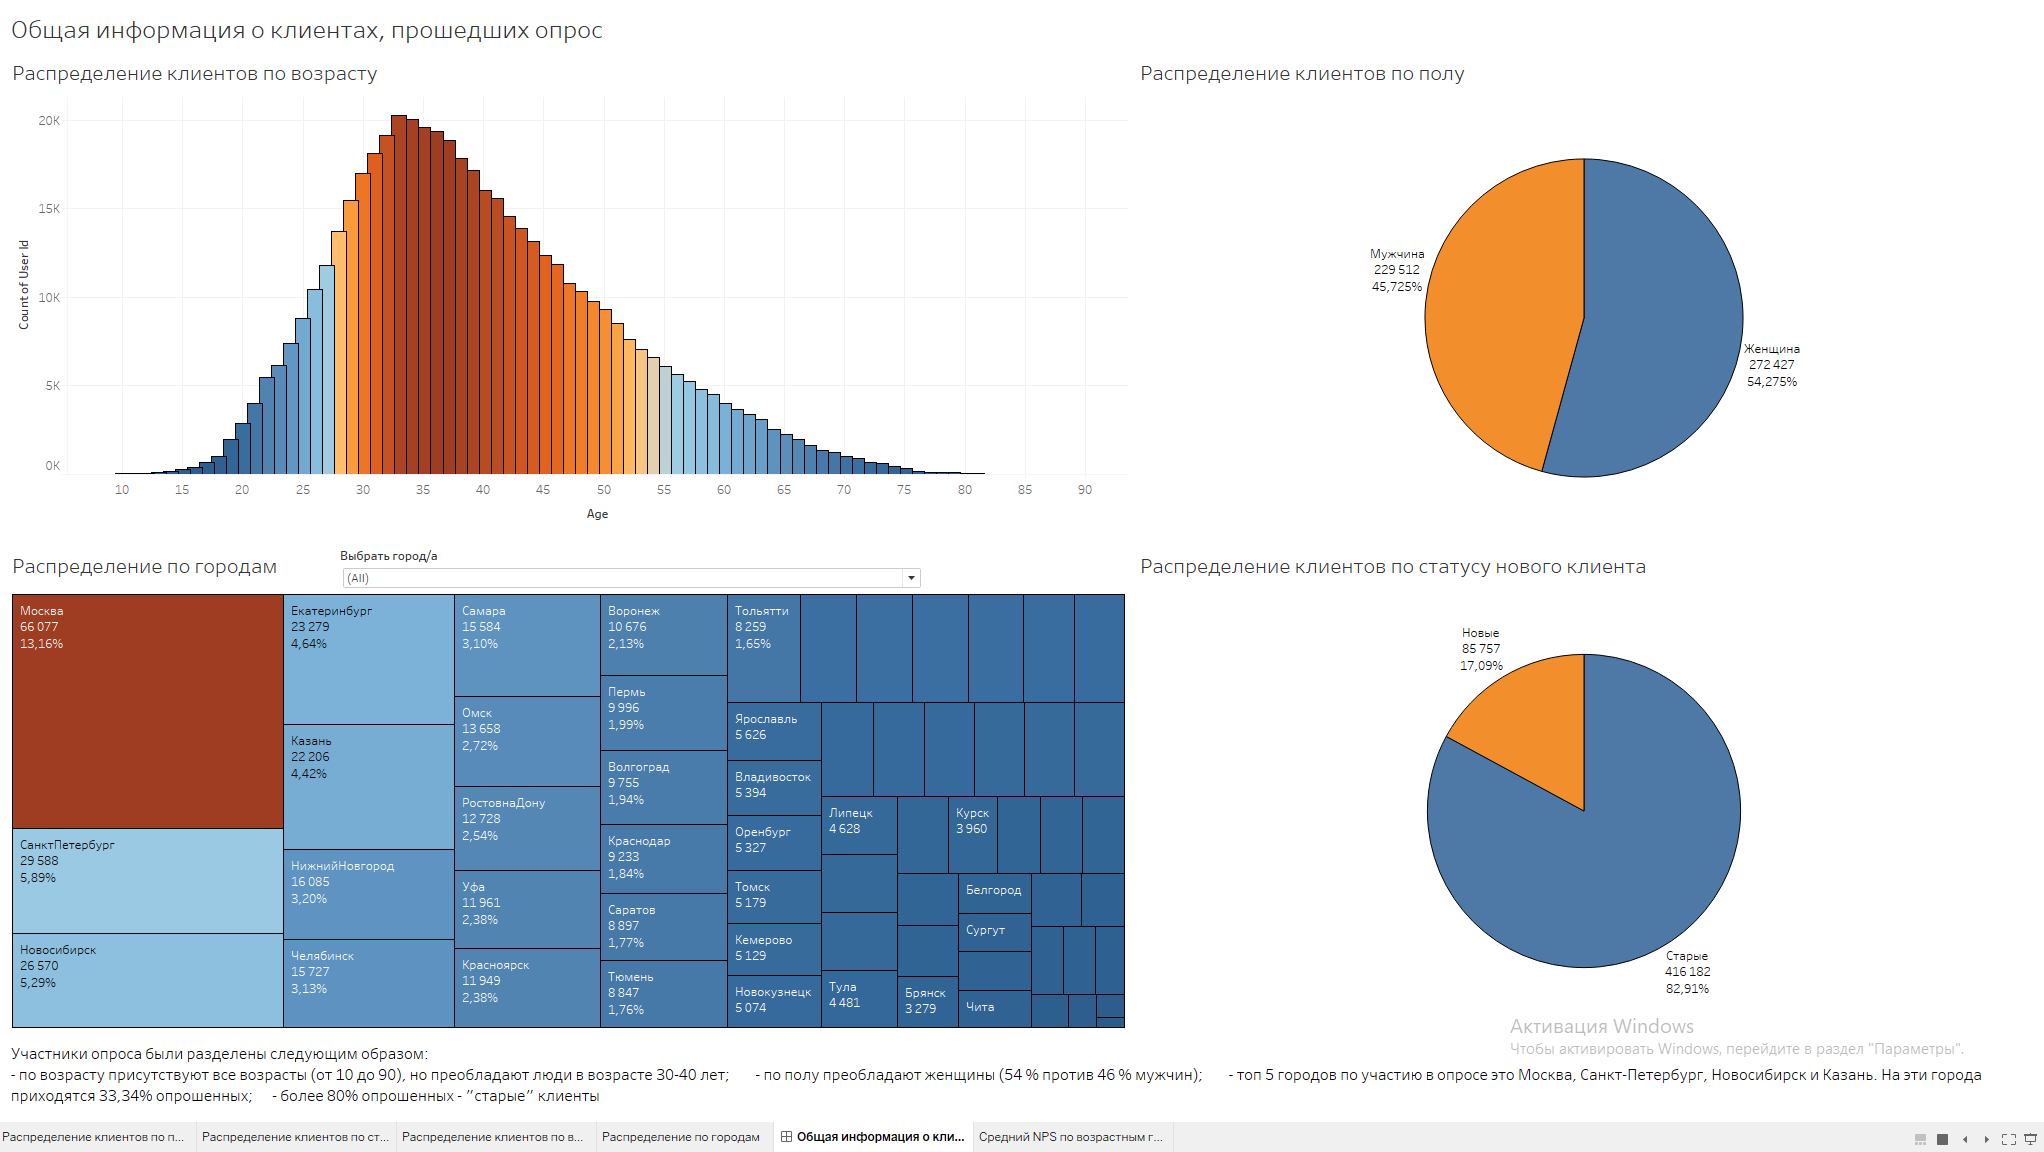

На данном дашборде отображено:
- распределение клиентов по возрасту;
- распределение клиентов по полу;
- распределение клиентов по городам;
- распределение клиентов по статусу нового клиента

Присутствует фильтр, который позволяет выбрать любой город/комбинацию городов, где проводился опрос

Настроено действие, что при выборе какого-либо сегмента на любой из визуализаций, остальные визуализации будут отфильтрованы соотвественно

Были сделаны следующие выводы:
- по возрасту присутствуют все возрасты (от 10 до 90), но преобладают люди в возрасте 30-40 лет;        
- по полу преобладают женщины (54 % против 46 % мужчин);        
- топ 5 городов по участию в опросе это Москва, Санкт-Петербург, Новосибирск и Казань. На эти города приходятся 33,34% опрошенных;      
- более 80% опрошенных - "старые" клиенты

Для рассмотрения NPS и использованием различных критериев был построен дашборд №2

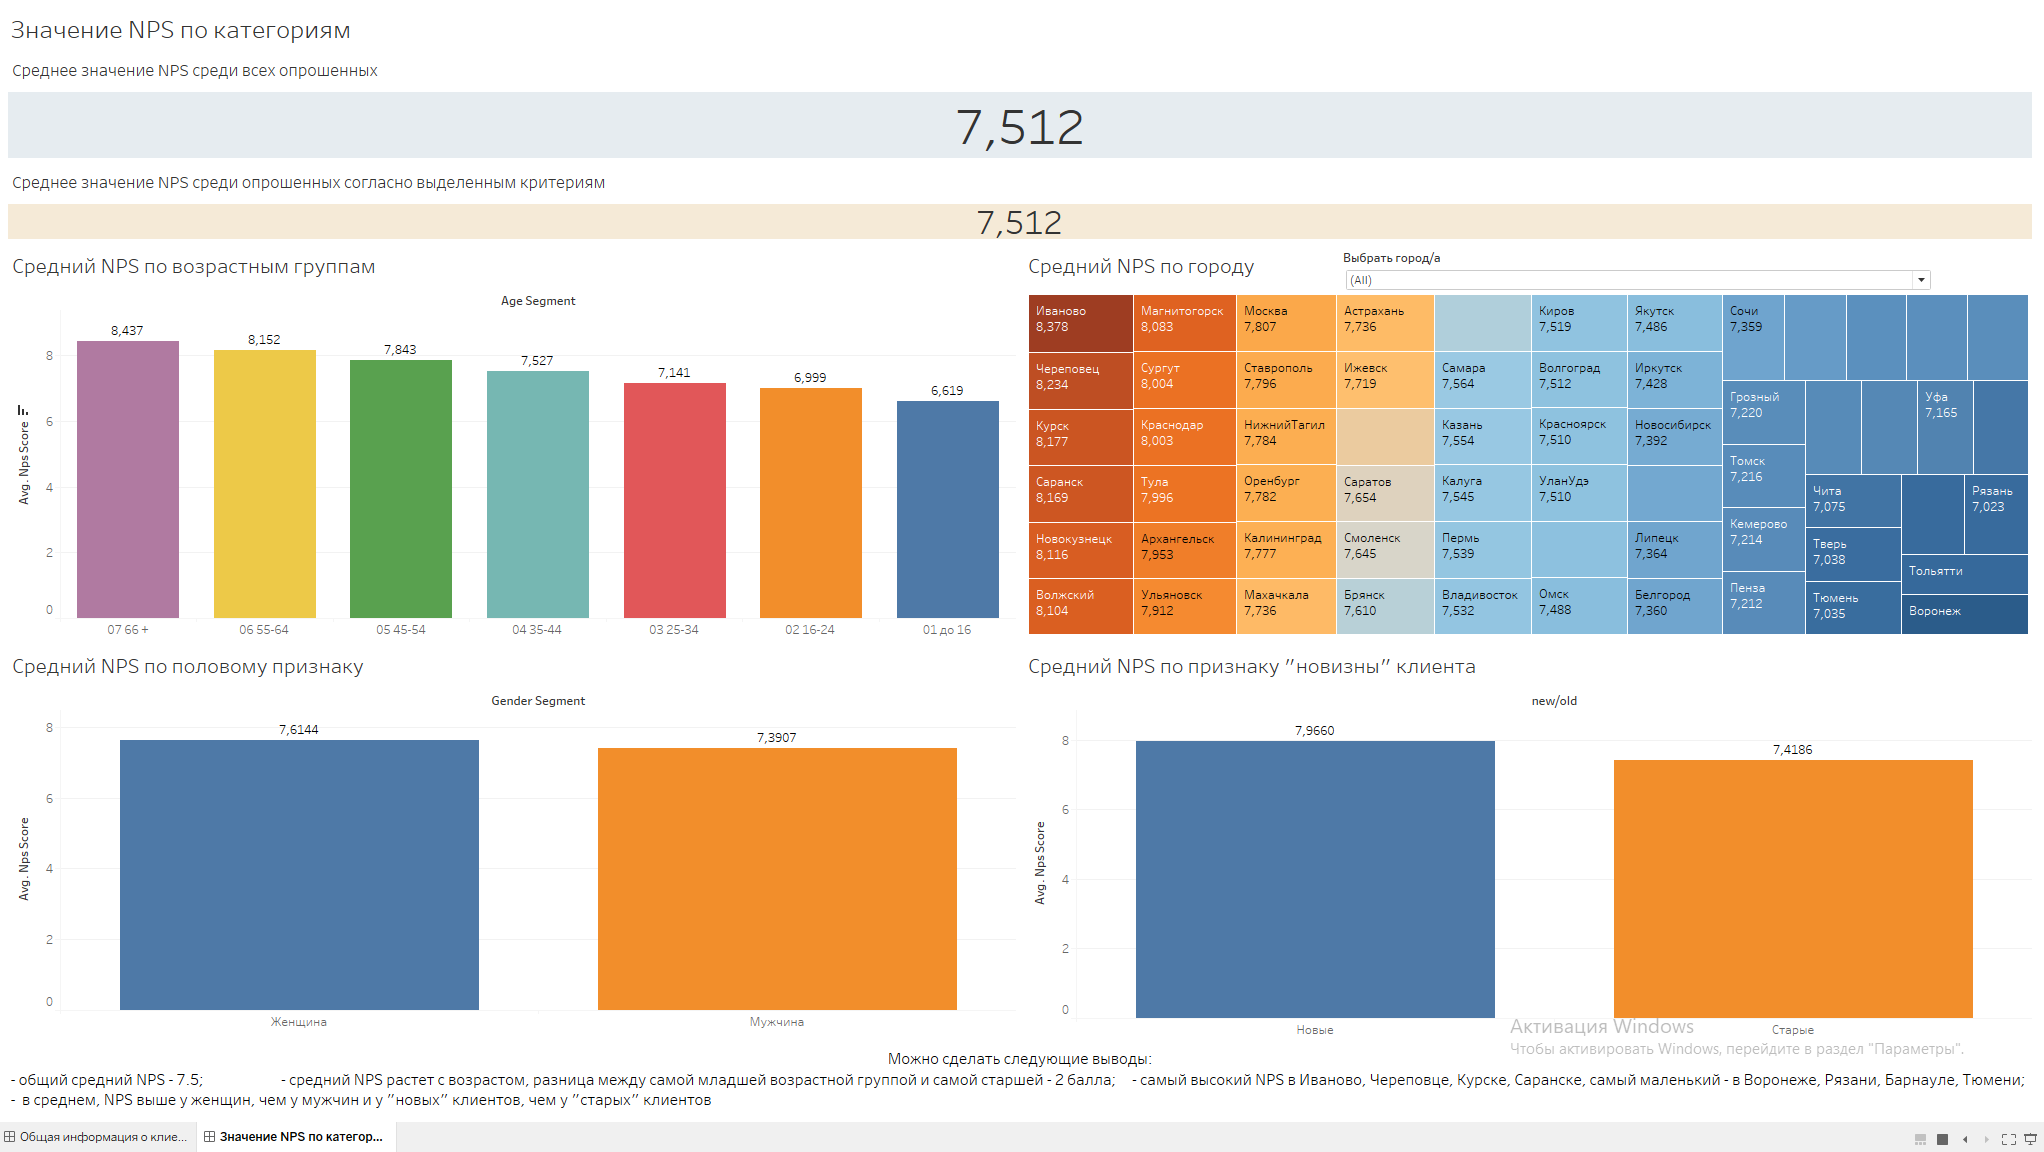

На данном дашборде отображено:
- среднее значение NPS;
- среднее значение NPS, меняющееся в зависимости от выбранных критериев;
- среднее значение NPS по возрастным группам;
- среднее значение NPS по городу;
- среднее значение NPS по половому признаку;
- среднее значение NPS по признаку "новизны" клиента

Присутствует фильтр, который позволяет выбрать любой город/комбинацию городов, где проводился опрос

Настроено действие, что при выборе какого-либо сегмента на любой из визуализаций, остальные визуализации будут отфильтрованы соотвественно

Были сделаны следующие выводы:
- общий средний NPS - 7.5;                        
- средний NPS растет с возрастом, разница между самой младшей возрастной группой и самой старшей - 2 балла;     
- самый высокий NPS в Иваново, Череповце, Курске, Саранске, самый маленький - в Воронеже, Рязани, Барнауле, Тюмени;         
- в среднем, NPS выше у женщин, чем у мужчин и у "новых" клиентов, чем у "старых" клиентов

Для изучения данных о "сторонниках" был сделан дашборд №3

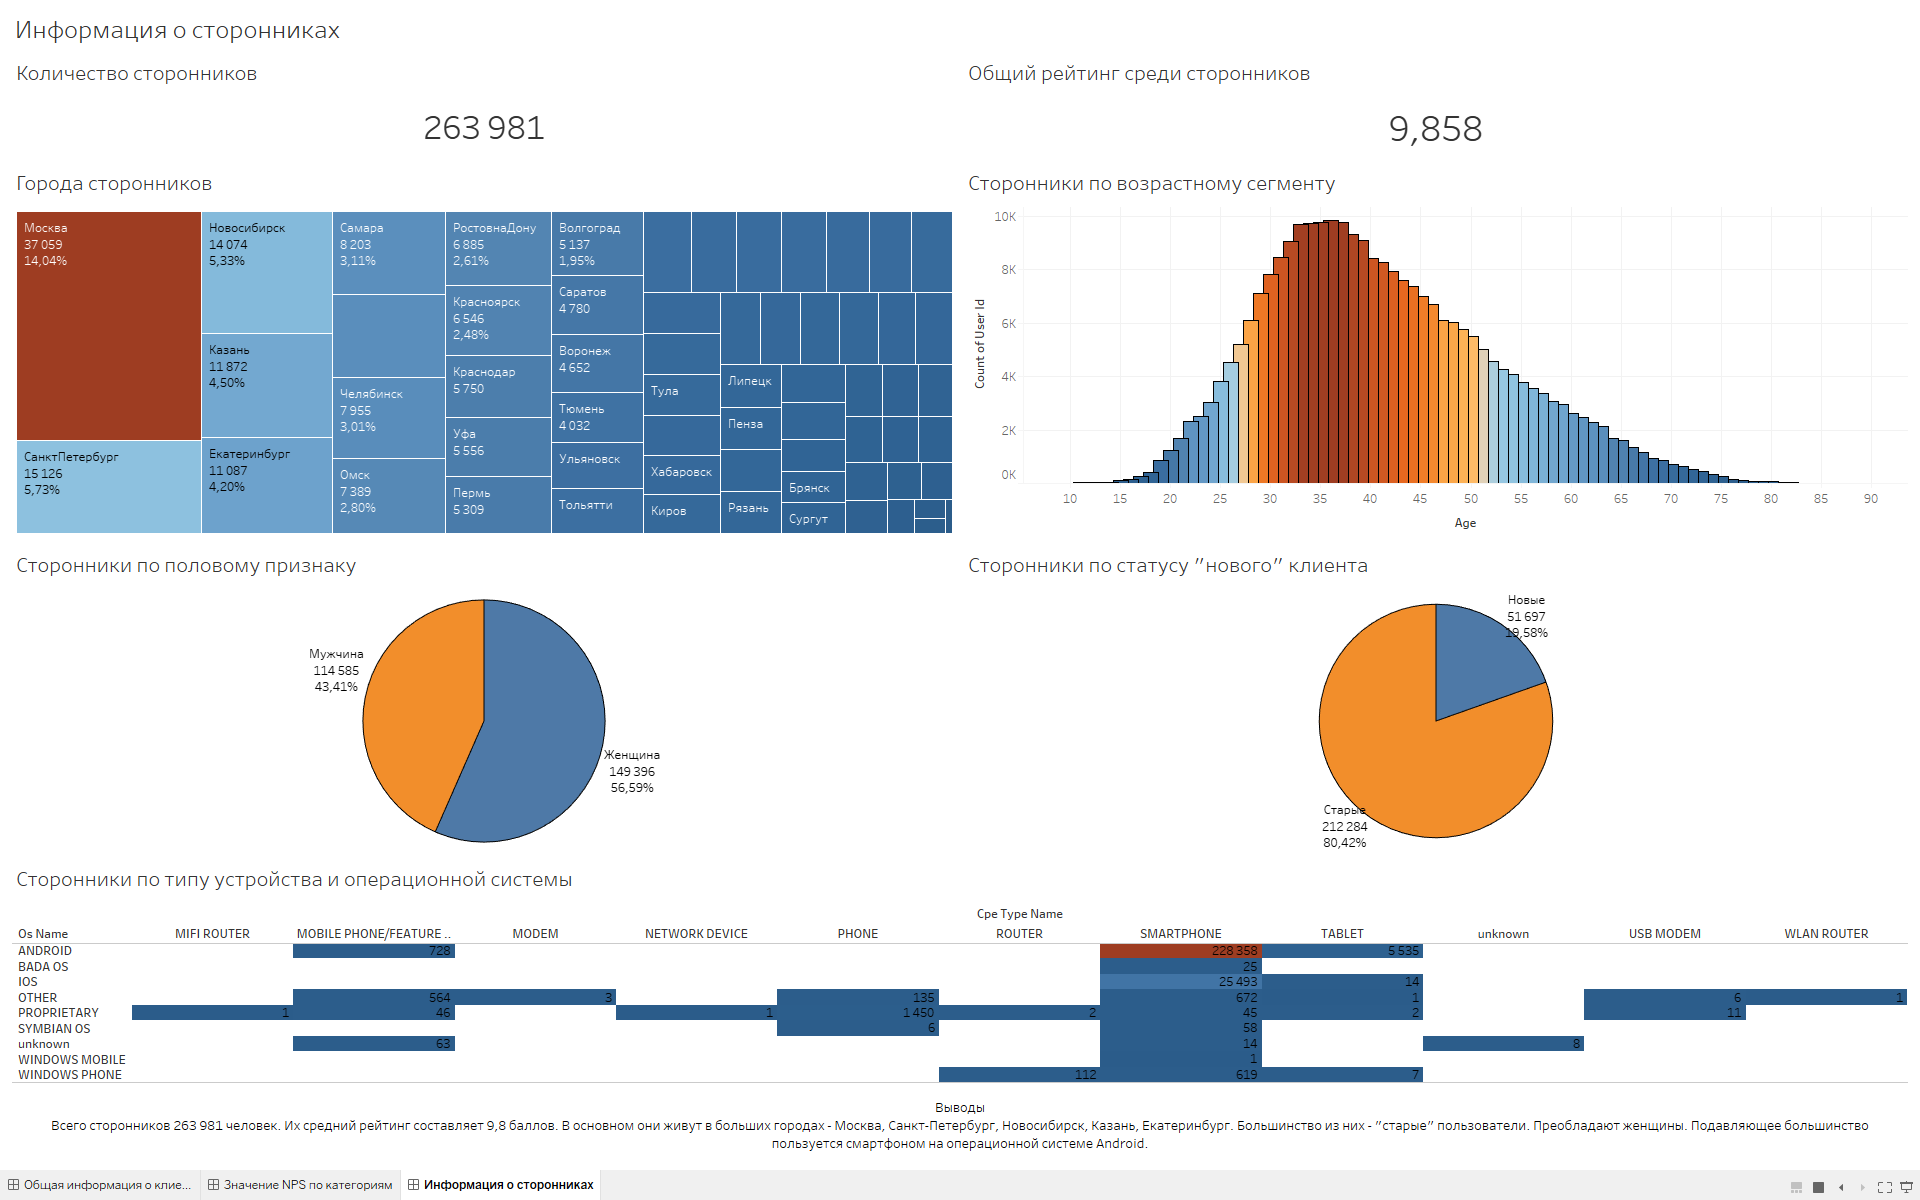

На дашборде отображено:
- кол-во сторонников
- средний рейтинг среди сторонников
- города, в которых проживают сторонники
- распределение сторонников по возрасту
- сторонники по половому признаку
- сторонники по статусу "нового" клиента
- типы устройств и операционных систем сторонников

Настроено действие, что при выборе какого-либо сегмента на любой из визуализаций, остальные визуализации будут отфильтрованы соотвественно

Были сделаны следующие выводы:
- всего сторонников 263 981 человек
- средний рейтинг составляет 9,8 баллов 
- в основном они живут в больших городах - Москва, Санкт-Петербург, Новосибирск, Казань, Екатеринбург 
- большинство из них - "старые" пользователи 
- преобладают женщины
- средний возраст - между 30 и 45 годами
- подавляющее большинство пользуется смартфоном на операционной системе Android.

Из трех дашбордов была построена презентация

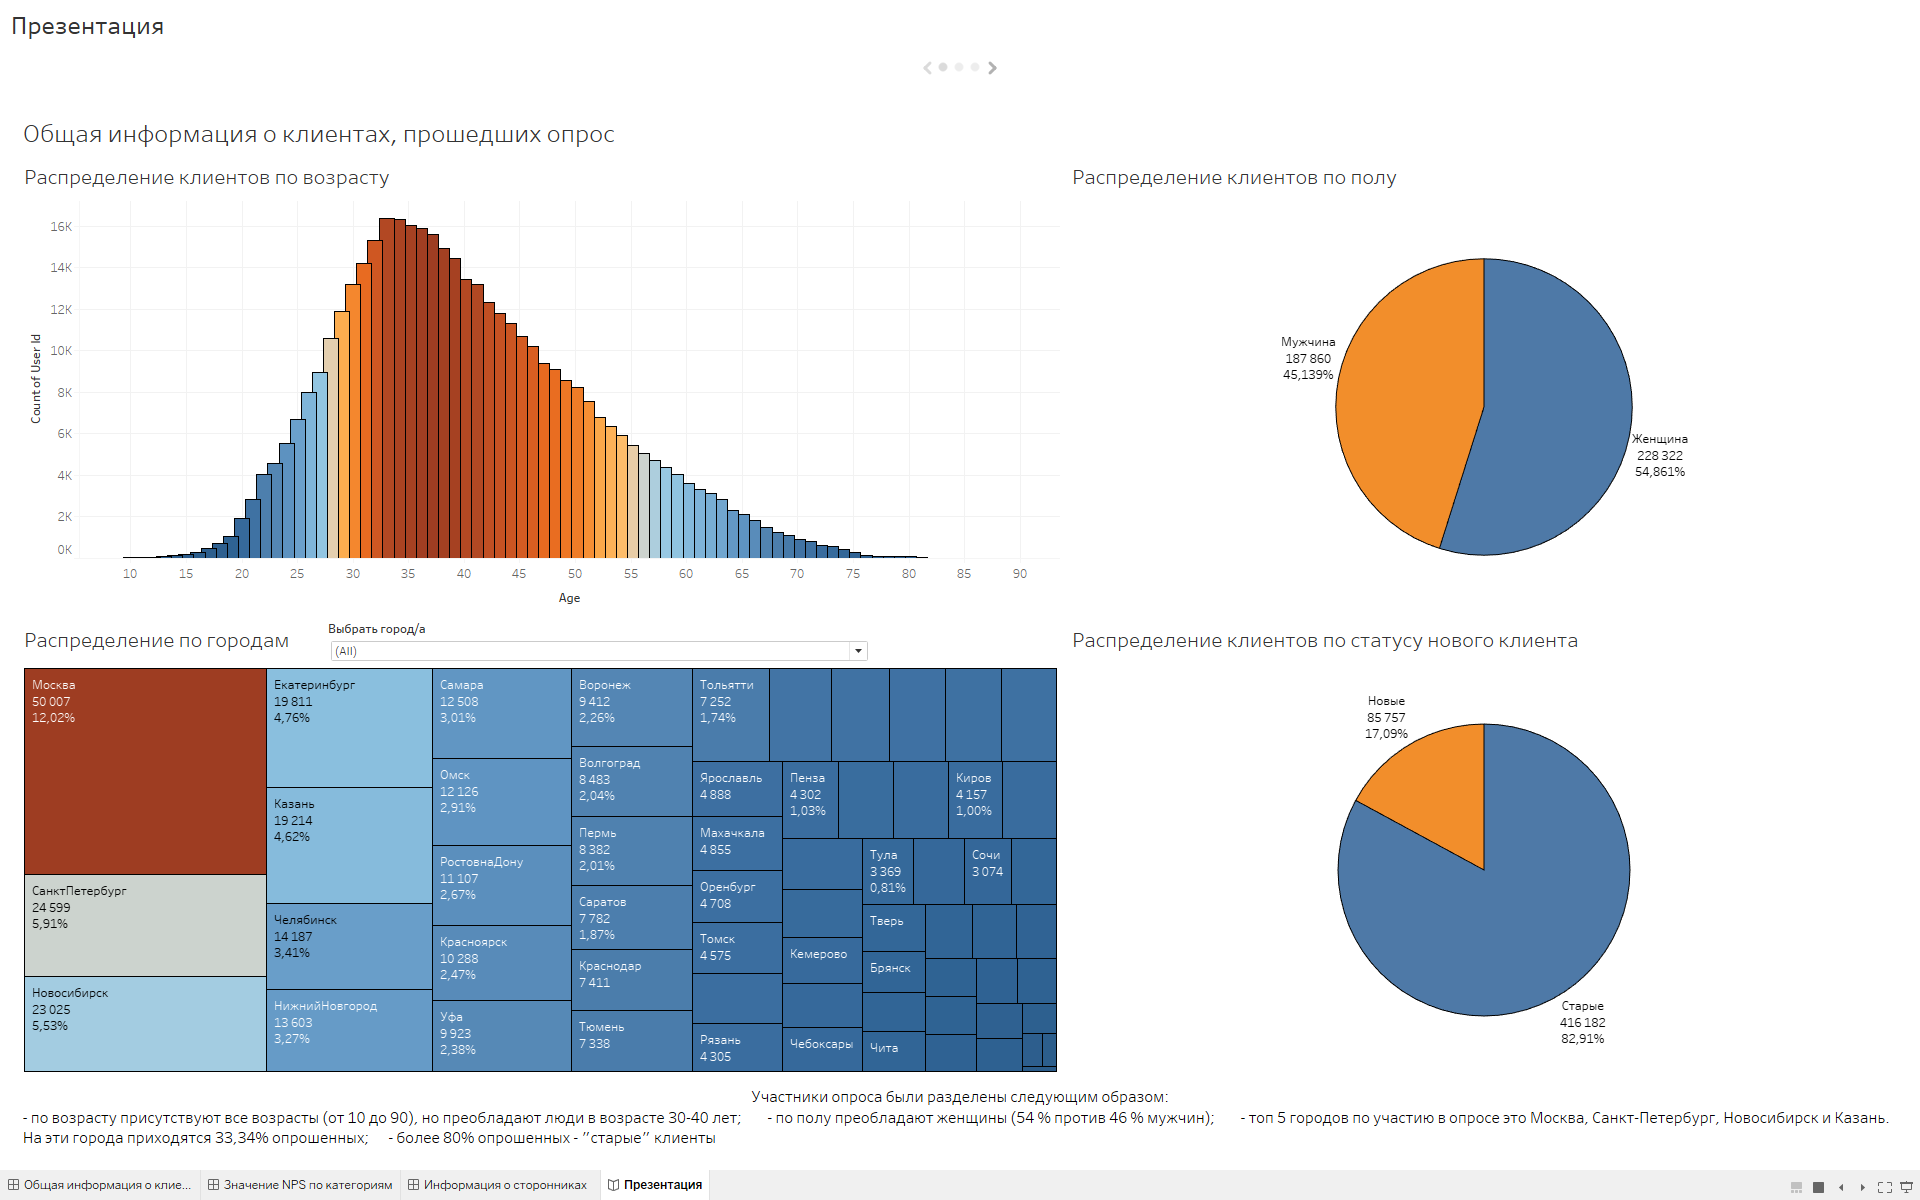

Ссылка на презентацию - https://public.tableau.com/views/Project_2_17036643433150/sheet3?:language=en-US&:display_count=n&:origin=viz_share_link

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера по Дашборду:</b>

    
Отличный анализ групп по пользователям, добавлены графики по основным категориям: полу, возрасту, городам, выведено соотношение новых и старых пользователей, добавлены Action.
    
Здорово, что сделан анализ по группам и дополнительно проанализированны сторонники.
    

</div>


<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера по Дашборду:</b> 

Есть несколько замечаний, которые необходимо скорректировать:    

- доработай, пожалуйста, tooltips, вместо стандартного текста выведи более понятные обозначения данных, в этом видео подробно рассказывают, как прокачать навык работы с tooltips - https://www.youtube.com/watch?v=DTcflF6Cf6A
    
    
- доработай, пожалуйста, анализ уровня лояльности - NPS (NPS рассчитывается по формуле: % «сторонников» - % «критиков», статья, которая тебе поможет лучше сориентироваться в этой теме - https://vc.ru/trade/651947-chto-takoe-nps-kak-ego-rasschitat-i-uvelichit?ysclid=lly5xzfbm8247027075) по нескольким разрезам, построй графики по: городам, возрасту, полу, типу пользователя, по времени пользования сервисом (lifetime), сейчас проведен некорректный анализ NPS

</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Был заново скачан файл и переделана презентация (визуализации и дашборды). Были осуществлены следующие изменения:
    
 - были доработаны tooltips для отражения релевантной информации
 - был переделан дашборд анализа уровня лояльности - были проведены необходимые вычисления, построены соответствующие графики.</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> ссылка на презентацию ниже </div>

https://public.tableau.com/views/Project2_1_17051367380920/sheet0?:language=en-US&:display_count=n&:origin=viz_share_link

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера в2:</b> 

Спасибо за проработку замечаний, твоя презентация стала лучше, молодец!

## Выводы

Были выполнены следующие шаги:
- осуществлено подключение к базе данных
- построение комплексной таблицы с помощью зароса SQL
- первичная проверка данных
- выгрузка датафрейма в качестве файла csv
- построение визуализаций и дашбордов, используя Tableu
- создание презентации на основе дашбордов